## Project : Identify customer segments for online retail with the use of K-means clustering

### Problem Satement:
Online retail companies generate massive volumes of customer transaction data every day. However, without proper analysis, this data provides little value in understanding customer behavior or designing effective marketing strategies. Retailers often struggle to personalize offers, manage customer relationships, and allocate marketing budgets without a clear understanding of different types of customers.

To address this issue, the goal of this project is to identify meaningful customer segments using K-Means clustering based on purchasing behavior. By analyzing attributes such as customer frequency, recency, and monetary value, we aim to uncover naturally occurring groups within the customer base. These segments will help the business:

- Recognize high-value customers

- Target customers who are likely to churn

- Design personalized marketing campaigns

- Improve customer retention

- Increase overall sales and engagement

The project involves cleaning and preparing the dataset, engineering important behavioral metrics (like RFM features), scaling the data, and applying K-Means clustering to group customers with similar purchasing patterns. The final output will provide clear insights into different customer segments along with recommendations for targeted business strategies.

### Notebook Structure

1. Importing Libraries
2. Reading Data
3. Basic EDA
    1. Missing values
4. Data Preprocessing
    1. Removing the missing values
    2. Checking for duplicate rows
    3. Outliers
5. RFM Analysis
    1. Recency
    2. Frequency
    3. Monetary Value
6. Clustering products into product categories
    1. The Elbow Method
    2. Visualizing the clusters
7. Customer Segmentation using Unsupervised Learning
    1. PCA
    2. K-Means Clustering
8. Understanding Clusters


### 1.Importing Libraries

In [107]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

### 2. Reading Data

In [108]:
# read the dataset
retail_df = pd.read_excel('Online Retail.xlsx')


### 3. Basic EDA

In [109]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [110]:
# basics of the df
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [111]:
# new column: amount 
retail_df['Total Price'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Missing values

In [112]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', retail_df.isnull().values.sum())
print('Percent of missing values per feature: ') 
round(retail_df.isnull().sum() * 100 / len(retail_df),2)

Number of missing values:  136534
Percent of missing values per feature: 


InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
Total Price     0.00
dtype: float64

CustomerID – 24.93% Missing (Most Important Column), drop the rows where CustomerID is missing. Customer segmentation requires customer-level analysis. Without CustomerID, you cannot compute RFM (Recency, Frequency, Monetary).These rows cannot be assigned to any customer → they are useless for segmentation. Description – 0.27% missing best way to drop.

In [113]:
#removing missing values of both the columns
retail_df.dropna(inplace=True)
#resetting the index
retail_df.reset_index(drop=True, inplace=True)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [114]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total Price    0
dtype: int64

In [115]:
print('Number of missing values: ', retail_df.isnull().values.sum())
print('Data lenght: ', len(retail_df))

Number of missing values:  0
Data lenght:  406829


### Checking for duplicate rows


In [116]:
retail_df.duplicated().sum()

5225

In [117]:
# Remove duplicate records from a dataframe
retail_df.drop_duplicates(inplace=True)

### Checking for outliers
To remove outliers safely in the Online Retail dataset (especially before creating RFM and performing K-Means clustering), we must follow a method that removes only true errors while keeping valuable business behaviour.


In [118]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,430.352218


#### Interpretation
1. Quantity: Most quantities are small (median = 5)
    - But there are extreme outliers on both sides (+80,995 and -80,995!)
    - The negative quantities represent returns/refunds
    - We cannot include Quantity directly in clustering because,
    - It's highly skewed      
    - Contains massive outliers
    - StandardScaler will distort it
    - Usually, you use Frequency, not raw Quantity.
2. InvoiceDate: You won’t use InvoiceDate directly.You will convert it into Recency.
3. UnitPrice: Most products cost ₹1–₹4. But one item costs £38,970 → huge outlier. Many items have 0 price → likely errors or promotions

In [119]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Total Price  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


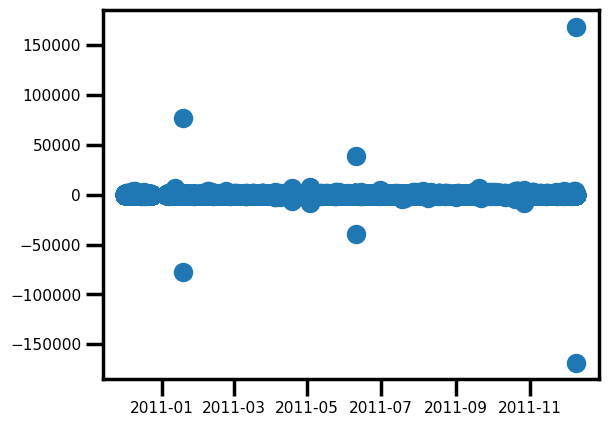

In [120]:
# we will see scatter plot for amount instead of Quantity as we are using amount in RFM analysis
plt.scatter(retail_df['InvoiceDate'], retail_df['Total Price'])
plt.show()


In [ ]:
#As we will deal with Total price removing outliers from total price will also remove outlier data related to quantity
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

retail_df = remove_outliers_iqr(retail_df, 'Total Price')

In [122]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
count,395352.000000,395352,395352.000000,395352.000000,395352.000000
mean,9.947229,2011-07-10 12:51:05.686881792,2.932184,15282.764739,15.883564
min,-1200.000000,2010-12-01 08:26:00,0.000000,12347.000000,-98.750000
25%,2.000000,2011-04-06 14:25:00,1.250000,13949.000000,4.250000
50%,5.000000,2011-07-29 15:51:00,1.950000,15150.000000,10.790000
75%,12.000000,2011-10-20 12:21:00,3.750000,16788.000000,18.000000
max,12540.000000,2011-12-09 12:50:00,165.000000,18287.000000,167.400000
std,28.371527,NaN,3.771774,1712.783343,20.736390


We still have some -ve values we need to remove it.

In [123]:
#Invoice numbers with “C” are returns/credit notes.
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.contains('C')]

#Remove negative or zero of Total Price
retail_df = retail_df[retail_df['Total Price'] > 0]
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
count,386906.000000,386906,386906.000000,386906.000000,386906.000000
mean,10.256455,2011-07-10 20:06:41.064237824,2.898756,15289.133270,16.501067
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000,0.001000
25%,2.000000,2011-04-07 10:33:00,1.250000,13959.000000,4.950000
50%,5.000000,2011-07-31 12:08:00,1.950000,15152.000000,11.800000
75%,12.000000,2011-10-20 13:46:00,3.750000,16791.000000,19.500000
max,2400.000000,2011-12-09 12:50:00,165.000000,18287.000000,167.400000
std,20.066405,NaN,3.695554,1712.224064,20.412350


### Feature Engineering

### 5. RFM Analysis 
   - R (Recency): Number of days since last purchase
   - F (Frequency): Number of tracsactions
   - M (Monetary): Total amount of transactions (revenue contributed)
   - RFM Segmentation using scores    
   - Visualizing the RFM Level customers using a bar plot

In [124]:
# Monetary Value
total = retail_df.groupby('CustomerID')['Total Price'].sum()
total= total.reset_index()
total.head()

,CustomerID,Total Price
0,12347.0,4060.40
1,12348.0,1557.24
2,12349.0,1457.55
3,12350.0,334.40
4,12352.0,1665.74


In [125]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12347.0,181
1,12348.0,30
2,12349.0,72
3,12350.0,17
4,12352.0,82


In [ ]:
# Merge Dataframe unit price and frequency
tot_freq = pd.merge(total, frequency, on='CustomerID', how='inner')
tot_freq.head()
print("Size : ",tot_freq.shape)


Size :  (4283, 3)


In [127]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [128]:
# convert to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], 
                                          format='%d-%m-%Y %H:%M')

In [129]:
# calculate the date diffenve of the max date and the last purchase i.e invoiceDate
max_date = max(retail_df['InvoiceDate'])
retail_df['Diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [130]:
# recency
last_purchase = retail_df.groupby('CustomerID')['Diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,Diff
0,12347.0,1 days 20:58:00
1,12348.0,74 days 23:37:00
2,12349.0,18 days 02:59:00
3,12350.0,309 days 20:49:00
4,12352.0,35 days 22:13:00


In [131]:
# merge
rfm_df = pd.merge(tot_freq, last_purchase, on='CustomerID', how='inner')
rfm_df.columns = ['CustomerID', 'Total Price', 'Frequency', 'Recency']
rfm_df.head()

,CustomerID,Total Price,Frequency,Recency
0,12347.0,4060.40,181,1 days 20:58:00
1,12348.0,1557.24,30,74 days 23:37:00
2,12349.0,1457.55,72,18 days 02:59:00
3,12350.0,334.40,17,309 days 20:49:00
4,12352.0,1665.74,82,35 days 22:13:00


In [132]:
# Omit the time character keep the days only. 
#rfm_df['Recency'] = pd.to_timedelta(rfm_df['Recency'], errors='coerce')
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df.head()

,CustomerID,Total Price,Frequency,Recency
0,12347.0,4060.40,181,1
1,12348.0,1557.24,30,74
2,12349.0,1457.55,72,18
3,12350.0,334.40,17,309
4,12352.0,1665.74,82,35


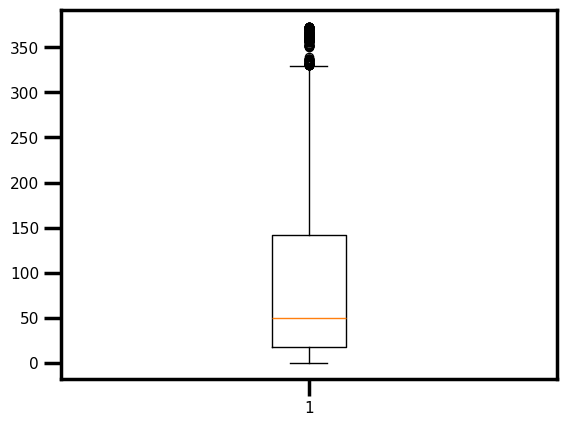

In [133]:

plt.boxplot(rfm_df['Recency'])
plt.show()

Here we are not going to remove outlier because a customer who bought 300 days ago is not an outlier — they are simply inactive.<br>
Analysis:
- Low recency → Recent buyers (active customers)
- High recency → Dormant customers
- Very high recency → Lost customers<br>

If you remove large recency values, you lose the ability to identify Lost customers, At-risk customers, Occasional buyers.

- High-frequency customers = loyal customers
- High-monetary customers = premium customers<br>
These are key customer segments (VIP, Champions)Removing them breaks the business insights.

#### Scaling and Standardisation 

In [134]:

nocust_rfm_df = rfm_df[['Total Price', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(nocust_rfm_df)
rfm_df_scaled.shape

(4283, 3)

In [135]:
# Convert rfm_df_scaled arraytype to dataframe

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Total Price', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Total Price,Frequency,Recency
0,0.646461,0.404598,-0.905212
1,0.016757,-0.269251,-0.175575
2,-0.008321,-0.081823,-0.735297
3,-0.290865,-0.327264,2.173258
4,0.044052,-0.037197,-0.565381


#### K-Means

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)